In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

birddata = pd.read_csv("bird_tracking.csv", index_col=0)
birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


In [5]:
birddata.info

<bound method DataFrame.info of        altitude               date_time  device_info_serial   direction   latitude  longitude  speed_2d bird_name
0            71  2013-08-15 00:18:08+00                 851 -150.469753  49.419860   2.120733  0.150000      Eric
1            68  2013-08-15 00:48:07+00                 851 -136.151141  49.419880   2.120746  2.438360      Eric
2            68  2013-08-15 01:17:58+00                 851  160.797477  49.420310   2.120885  0.596657      Eric
3            73  2013-08-15 01:47:51+00                 851   32.769360  49.420359   2.120859  0.310161      Eric
4            69  2013-08-15 02:17:42+00                 851   45.191230  49.420331   2.120887  0.193132      Eric
...         ...                     ...                 ...         ...        ...        ...       ...       ...
61915        11  2014-04-30 22:00:08+00                 833   45.448157  51.352572   3.177151  0.208087     Sanne
61916         6  2014-04-30 22:29:57+00                 

In [6]:
birddata.tail()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne
61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne
61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne
61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne
61919,9,2014-04-30 23:59:34+00,833,149.949008,51.354474,3.181057,0.485489,Sanne


The data consists of almost **62,000** data points and 9 features or columns

In [7]:
birddata.bird_name.value_counts()

Nico     21121
Sanne    21004
Eric     19795
Name: bird_name, dtype: int64

There are **3 types of birds** in our dataset, named *Nico*, *Sanne*, *Eric*

Linear estimation - because the earth is not flat - of flight trajectory of bird migration of a particular bird **"Eric"**. The trajectory will be substantially distorted because we have not done any *Cartographic Projection* of the flight trajectory.

This plot is just to get a rought look at the flight trajectory of a bird

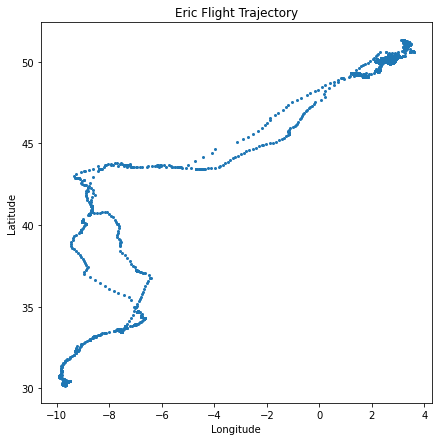

In [20]:
ind = birddata.bird_name == "Eric"
x, y = birddata.longitude[ind], birddata.latitude[ind]
plt.figure(figsize=(7,7))
plt.plot(x, y, "o", ms=2)
plt.savefig("Eric_migration_2D_trajectory")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Eric Flight Trajectory")
plt.show()

Let's plot the flight trajectory for all of three birds

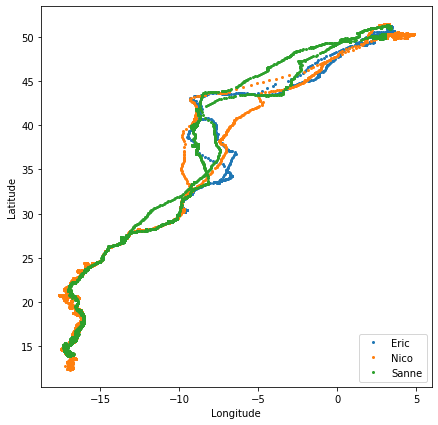

In [19]:
birds = birddata.bird_name.unique()
plt.figure(figsize=(7,7))
for bird in birds:
    ind = birddata.bird_name == bird
    x, y = birddata.longitude[ind], birddata.latitude[ind]
    plt.plot(x, y, "o", ms=2, label=bird)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="lower right")
plt.show()